/Users/apple/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


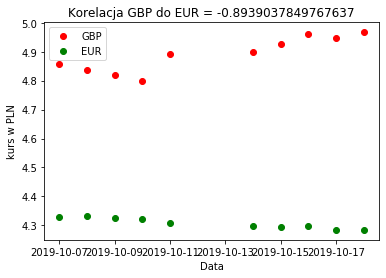

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [1]:
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Wczytaj przykładowy zbiór danych - dane dotyczące trzech gatunków Irysów
iris = datasets.load_iris()

# Podzielmy zbiór na cechy oraz etykiety - to już znamy
# Dla uproszczenia wybieramy tylko cechę trzecią i czwartą, tj długość i szerokość płatków
X = iris.data[:, [2, 3]]
y = iris.target

# Używamy funkcji do podzielenia zbioru na zbiór uczący i zbiór testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Tworzymy klasyfikator z trzema klastrami (klasami)
# Jak dotąd jest podobnie do Laboratorium 2
kmn = KMeans(n_clusters=3)

# Uczymy klasyfikator na danych treningowych
# Pierwsza różnica - uczenie przebiega bez nadzoru
# To znaczy nie pokazujemy klasyfikatorowi prawidłowych klas - gatunków kwiatów
# Zgodnie z konfiguracją wcześniej - powiedzieliśmy tylko że chcemy w zbiorze znaleźć 3 klasy
# Dokładny opis algorytmu: https://scikit-learn.org/stable/modules/clustering.html#k-means
kmn.fit(X_train)

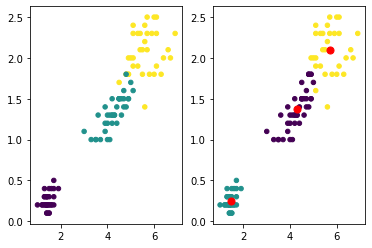

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# Wyciągamy punkty centralne klastrów - pokażemy je na wykresie obok punktów ze zbioru uczącego
centra = kmn.cluster_centers_

fig, ax = plt.subplots(1, 2)
# pierwszy wykres to nasz zbiór uczący, z prawdziwymi klasami
ax[0].scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20)

# Teraz używamy danych treningowych żeby sprawdzić co klasyfikator o nich myśli
y_pred_train = kmn.predict(X_train)
ax[1].scatter(X_train[:, 0], X_train[:, 1], c=y_pred_train, s=20)

# Dokładamy na drugim wykresie centra klastrów
ax[1].scatter(centra[:, 0], centra[:, 1], c='red', s=50)
plt.show()

# Różnice kolorów pomiędzy wykresami są nieistotne

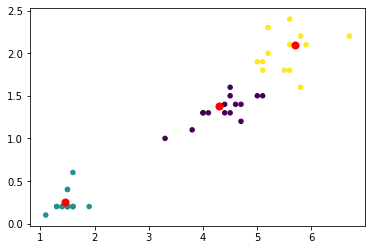

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

# Próbujemy przewidzieć gatunki dla zbioru testowego
y_pred = kmn.predict(X_test)

# Nowe gatunki przewidziane przez klastrowanie
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=20)

# Tak jak powyżej, wyświetlamy centra klastrów
plt.scatter(centra[:, 0], centra[:, 1], c='red', s=50)
plt.show()

Elementy zbioru:  ['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url']
target:  ['2' '0' '2' '2' '2' '2' '2' '2' '0' '1' '1' '0' '2' '2' '2' '2' '1' '2'
 '1' '0' '1' '0' '2' '2' '1' '1' '1' '2' '2' '2']
feature names:  ['MPG', 'cylinders', 'cubicInches', 'horsepower', 'weightLbs', 'time-to-sixty', 'year']
categories:  {'cylinders': ['3', '4', '5', '6', '8']}


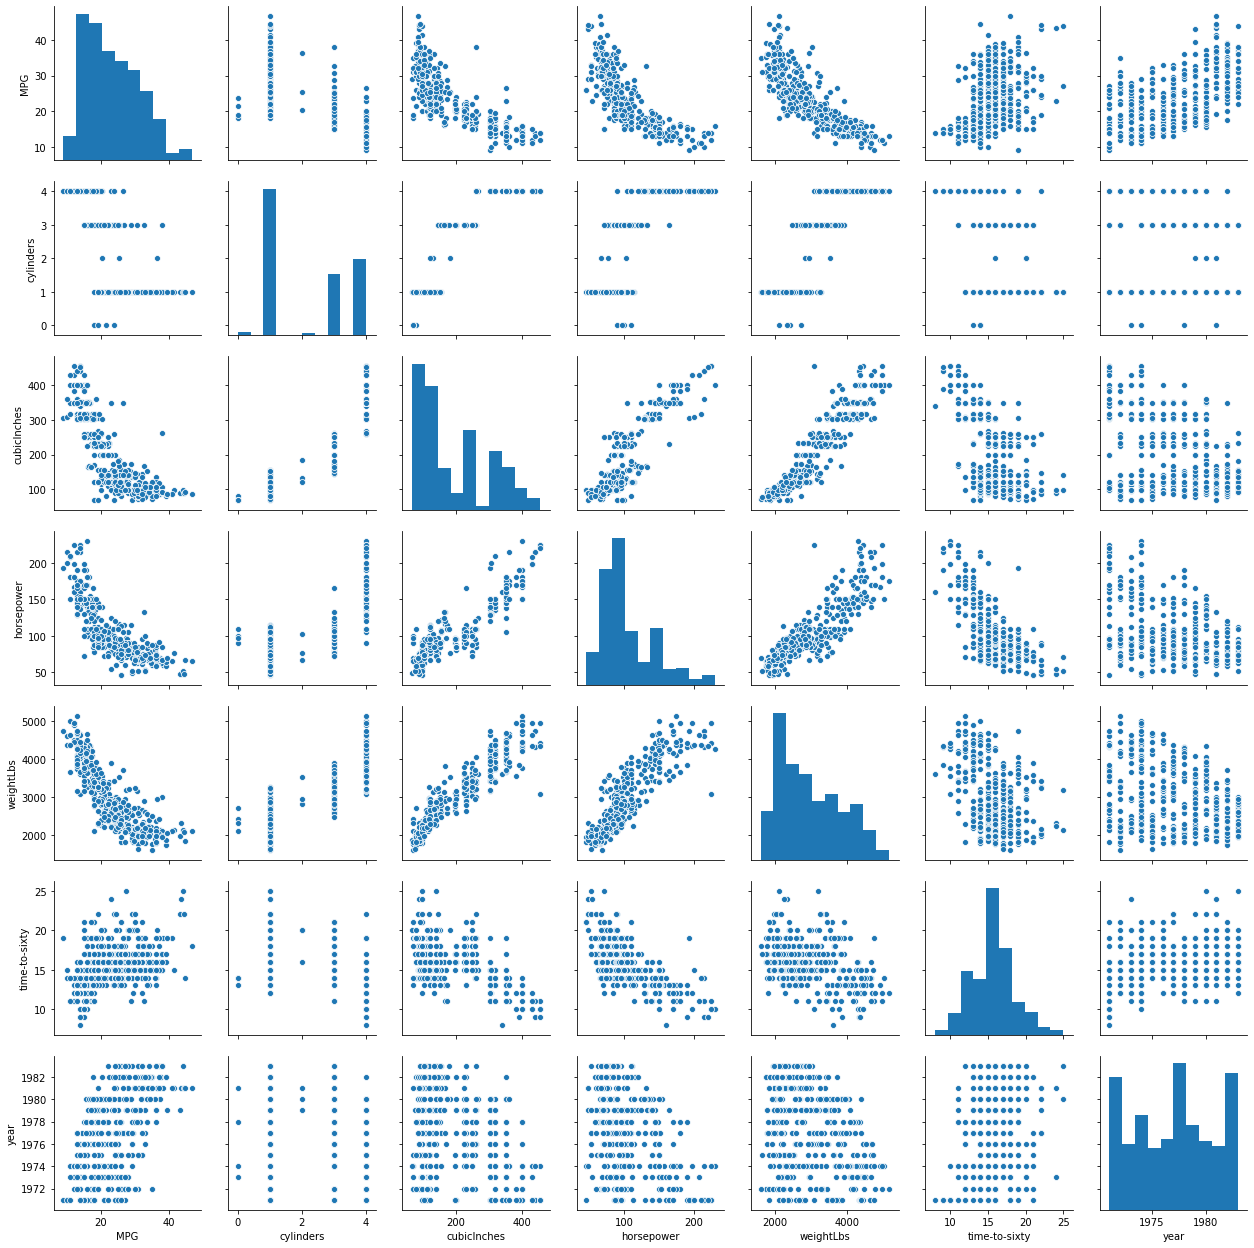

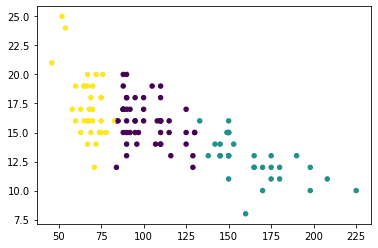

In [78]:
# Zadanie 1
# Poniżej przy pomocy funkcji fetch_openml można zaimportować zbiór danych o samochodach
# Zapoznaj się ze zbiorem danych (zwizualizuj wybrane przez siebie cechy) a następnie podziel go na zbiór uczący i testowy
# Wytrenuj klasyfikator KMeans z zadaną przez siebie liczbą klas i zwizualizuj wyniki predykcji na zbiorze testowym

# Zadanie 2
# Opisz własnymi słowami, jakie klasy samochodów wg Ciebie znalazły się w zbiorze
# Według mnie w zbiorze znalazły się samochody z klasy średniej i wyższej. Świadczy o tym waga auta, horsepower

from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns

samochody = fetch_openml('cars1')
print('Elementy zbioru: ', list(samochody.keys()))
#print('Przykładowe wartości cech:\n', samochody.data[:1])
print('target: ', samochody.target[:30])
print('feature names: ', samochody.feature_names)
#print('details: ', samochody.details)
print('categories: ', samochody.categories)

samochody_df = pd.DataFrame(samochody['data'], columns=samochody['feature_names'])
# wykres
sns.pairplot(samochody_df)
plt.show()

X = samochody.data[:, [3, 5]]
y = samochody['target']
y = [int(elem) for elem in y]

# Używamy funkcji do podzielenia zbioru na zbiór uczący i zbiór testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Tworzymy klasyfikator z trzema klastrami (klasami)
kmn = KMeans(n_clusters=3)

kmn.fit(X_train)

# Próbujemy przewidzieć gatunki dla zbioru testowego
y_pred = kmn.predict(X_test)

# Nowe gatunki przewidziane przez klastrowanie
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, s=20)

plt.show()


In [ ]:
samochody.keys()

In [ ]:
# Ściąga: Konwersja typów dla y

y = samochody['target']
y = [int(elem) for elem in y]
y[:5]